# Pymaceuticals Inc.
---

### Analysis

- My initial thought is that the different regimens are being unfairly compared due to the fact that different numbers of mice are being treated with each regimen, unless the standard deviation is used to compare them instead of the raw data. Generally, mouse weight and average tumor size have a direcly proportional relationship. Furthermore, on average, all of the drug regimens become more effective over time, except Propriva which appeared to become less effective over time and even made things worse (especially in female mice, this was also clearly seen in mouse g989). More specific observations I had were that; Capimulin and ramicane appear to be more effective in reducing tumor volume than infubinol and ceftamin, Ketapril and Naftisol have the highest tumor varience (68.55 & 66.17 respectively), finally, Naftisol was not very effective in reducing the volume of the tumor or number of metastatic sites in 9 month old 30g male mice.

In [2]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st


# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
pharma_data_complete_df= pd.merge(mouse_metadata, study_results, how="left", on=["Mouse ID"])

# Display the data table for preview
pharma_data_complete_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [4]:
pharma_data_complete_df.info

<bound method DataFrame.info of      Mouse ID Drug Regimen   Sex  Age_months  Weight (g)  Timepoint  \
0        k403     Ramicane  Male          21          16          0   
1        k403     Ramicane  Male          21          16          5   
2        k403     Ramicane  Male          21          16         10   
3        k403     Ramicane  Male          21          16         15   
4        k403     Ramicane  Male          21          16         20   
...       ...          ...   ...         ...         ...        ...   
1888     z969     Naftisol  Male           9          30         25   
1889     z969     Naftisol  Male           9          30         30   
1890     z969     Naftisol  Male           9          30         35   
1891     z969     Naftisol  Male           9          30         40   
1892     z969     Naftisol  Male           9          30         45   

      Tumor Volume (mm3)  Metastatic Sites  
0              45.000000                 0  
1              38.825898 

In [6]:
pharma_data_complete_df.shape

(1893, 8)

In [10]:
pharma_data_complete_df.describe()

,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
count,1893.000000,1893.000000,1893.000000,1893.000000,1893.000000
mean,12.814580,25.662441,19.572108,50.448381,1.021659
std,7.189592,3.921622,14.079460,8.894722,1.137974
min,1.000000,15.000000,0.000000,22.050126,0.000000
25%,7.000000,25.000000,5.000000,45.000000,0.000000
50%,13.000000,27.000000,20.000000,48.951474,1.000000
75%,20.000000,29.000000,30.000000,56.292200,2.000000
max,24.000000,30.000000,45.000000,78.567014,4.000000


In [11]:
# Checking the number of mice.
mice_count = len(pharma_data_complete_df["Mouse ID"].unique())
mice_count

249

In [13]:
# Checking the number of mice as an array.
mice_count = pharma_data_complete_df["Mouse ID"].unique()
mice_count

array(['k403', 's185', 'x401', 'm601', 'g791', 's508', 'f966', 'm546',
       'z578', 'j913', 'u364', 'n364', 'y793', 'r554', 'm957', 'c758',
       't565', 'a644', 'i177', 'j989', 'i738', 'a520', 'w914', 'r811',
       'g288', 'i334', 'q610', 'd251', 'l897', 'c458', 'b742', 'b128',
       'j246', 'a411', 'j119', 'w150', 'v923', 'g316', 's710', 'l509',
       'r944', 'e662', 'u196', 'q597', 'a444', 'i557', 'r921', 'w678',
       'y449', 'a203', 'a251', 'a262', 'a275', 'a366', 'a401', 'a457',
       'a492', 'a577', 'a685', 'a699', 'a788', 'a818', 'a897', 'a963',
       'b313', 'b447', 'b487', 'b559', 'b759', 'b879', 'c139', 'c264',
       'c282', 'c302', 'c326', 'c402', 'c559', 'c580', 'c757', 'c766',
       'c819', 'c832', 'c895', 'c927', 'd133', 'd164', 'd474', 'e213',
       'e227', 'e291', 'e476', 'e584', 'f129', 'f234', 'f278', 'f345',
       'f394', 'f436', 'f545', 'f932', 'f993', 'g107', 'g296', 'g497',
       'g558', 'g570', 'g867', 'g989', 'h246', 'h333', 'h428', 'h531',
      

In [15]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
duplicate_mice = pharma_data_complete_df.loc[pharma_data_complete_df.duplicated(subset=['Mouse ID', 'Timepoint']),'Mouse ID'].unique()
duplicate_mice

array(['g989'], dtype=object)

In [17]:
# Optional: Get all the data for the duplicate mouse ID.
duplicate_mice_df = pharma_data_complete_df.loc[pharma_data_complete_df["Mouse ID"] == "g989", :]
duplicate_mice_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [19]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
#mice_clean_df = pharma_data_complete_df[pharma_data_complete_df['Mouse ID'].isin(duplicate_mice_df)==False]
mice_clean_df = pharma_data_complete_df[pharma_data_complete_df['Mouse ID'] != 'g989']
mice_clean_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [21]:
# Checking the number of mice in the clean DataFrame.
mice_clean_count_df = mice_clean_df["Mouse ID"].nunique()

mice_clean_count_df

248

## Summary Statistics

In [23]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume.
summary_mean = mice_clean_df['Tumor Volume (mm3)'].groupby(mice_clean_df['Drug Regimen']).mean()
summary_median = mice_clean_df['Tumor Volume (mm3)'].groupby(mice_clean_df['Drug Regimen']).median()
summary_variance = mice_clean_df['Tumor Volume (mm3)'].groupby(mice_clean_df['Drug Regimen']).var()
summary_stdev = mice_clean_df['Tumor Volume (mm3)'].groupby(mice_clean_df['Drug Regimen']).std()
summary_sem = mice_clean_df['Tumor Volume (mm3)'].groupby(mice_clean_df['Drug Regimen']).sem()

# Assemble the resulting series into a single summary DataFrame.
summary_statistics_df = pd.DataFrame({"Mean Tumor Volume":summary_mean, 
                            "Median Tumor Volume":summary_median, 
                           "Tumor Volume Variance":summary_variance, 
                           "Tumor Volume Std. Dev.":summary_stdev, 
                           "Tumor Volume Std. Err.":summary_sem})
summary_statistics_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [25]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)
# Using the aggregation method, produce the same summary statistics in a single line
summary_aggregation =  mice_clean_df.groupby(['Drug Regimen'])[['Tumor Volume (mm3)']].agg(['mean', 'median', 'var', 'std', 'sem'])
summary_aggregation

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

In [27]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
mice_count = mice_clean_df["Drug Regimen"].value_counts()
mice_count

Drug Regimen
Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Placebo      181
Stelasyn     181
Infubinol    178
Ceftamin     178
Propriva     148
Name: count, dtype: int64

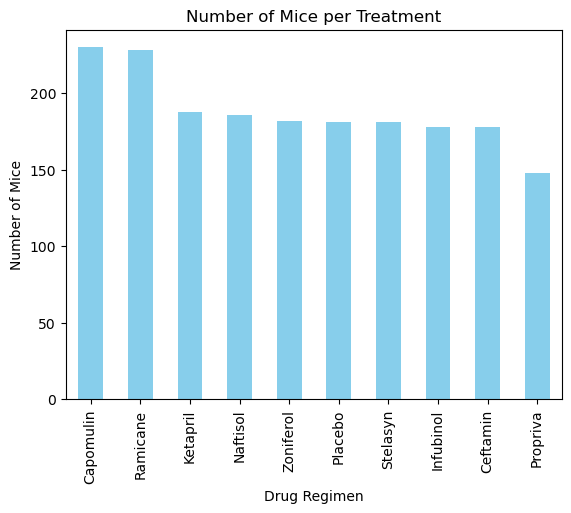

In [29]:
# Creating a bar plot
plot_pandas = mice_count.plot.bar(color='skyblue')  
# Set the xlabel, ylabel, and title using class methods
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")
plt.title("Number of Mice per Treatment")
plt.show()

In [31]:
# Calculate the total number of rows for each drug regimen
drug_counts = pharma_data_complete_df.groupby('Drug Regimen').size()
drug_counts


Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     161
Ramicane     228
Stelasyn     181
Zoniferol    182
dtype: int64

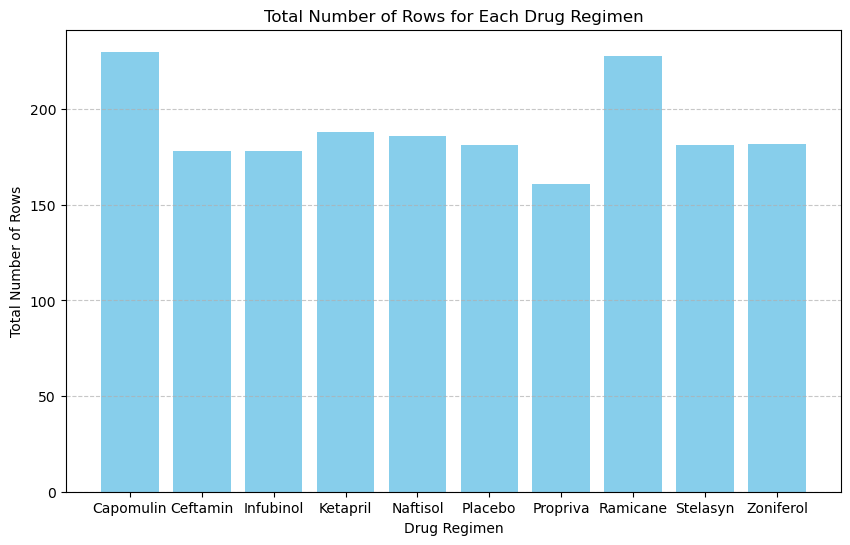

In [33]:

# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
plt.figure(figsize=(10, 6))
plt.bar(drug_counts.index, drug_counts.values, color='skyblue')

plt.xlabel('Drug Regimen')
plt.ylabel('Total Number of Rows')
plt.title('Total Number of Rows for Each Drug Regimen')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [41]:
# Generate a pie chart, using Pandas, showing the distribution of unique female versus male mice used in the study
# Cell 7: Generate pie plot using Pandas
gender_counts = mice_clean_df['Sex'].value_counts()
gender_counts

Sex
Male      958
Female    922
Name: count, dtype: int64

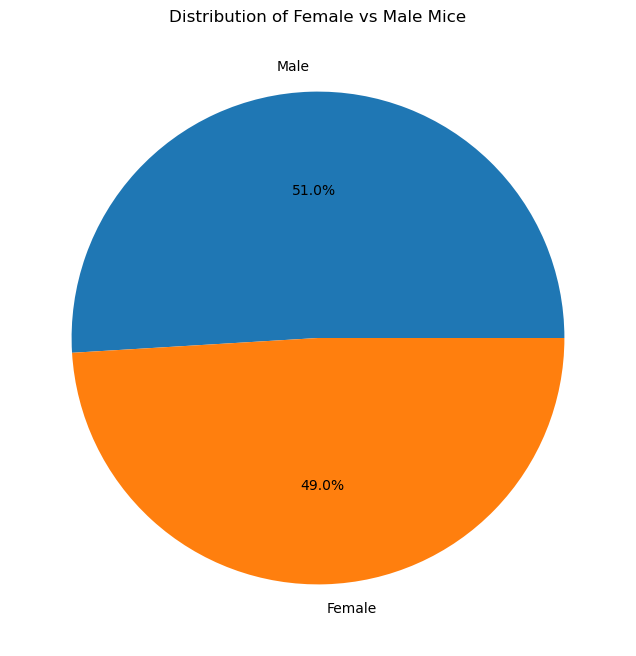

In [43]:
# Make the pie chart
gender_counts.plot(kind="pie", autopct="%1.1f%%", figsize=(8, 8))
plt.title("Distribution of Female vs Male Mice")
plt.ylabel("")
plt.show()

In [45]:
# Get the unique mice with their gender
unique_mice = pharma_data_complete_df.drop_duplicates(subset=['Mouse ID', 'Sex'])
unique_mice

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.0,0
10,s185,Capomulin,Female,3,17,0,45.0,0
20,x401,Capomulin,Female,16,15,0,45.0,0
30,m601,Capomulin,Male,22,17,0,45.0,0
40,g791,Ramicane,Male,11,16,0,45.0,0
...,...,...,...,...,...,...,...,...
1858,z314,Stelasyn,Female,21,28,0,45.0,0
1860,z435,Propriva,Female,12,26,0,45.0,0
1863,z581,Infubinol,Female,24,25,0,45.0,0
1873,z795,Naftisol,Female,13,29,0,45.0,0


In [47]:
# Count the number of unique mice for each gender
gender_counts = unique_mice['Sex'].value_counts()
gender_counts

Sex
Male      125
Female    124
Name: count, dtype: int64

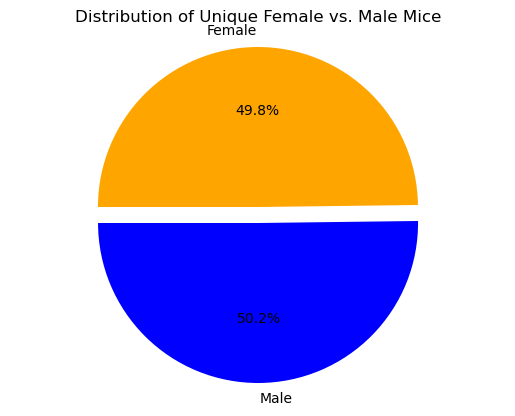

In [49]:
# Generate a pie chart, using pyplot, showing the distribution of unique female versus male mice used in the study
# Make the pie chart
fig, ax = plt.subplots()
explode = (0, 0.1)  
ax.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=180, explode=explode, colors=['blue', 'orange'])

plt.title('Distribution of Unique Female vs. Male Mice')
plt.axis('equal')
plt.show()

## Quartiles, Outliers and Boxplots

In [51]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin
Capomulin_df = pharma_data_complete_df.loc[pharma_data_complete_df["Drug Regimen"] == "Capomulin",:]
Ramicane_df = pharma_data_complete_df.loc[pharma_data_complete_df["Drug Regimen"] == "Ramicane", :]
Infubinol_df = pharma_data_complete_df.loc[pharma_data_complete_df["Drug Regimen"] == "Infubinol", :]
Ceftamin_df = pharma_data_complete_df.loc[pharma_data_complete_df["Drug Regimen"] == "Ceftamin", :]

# Start by getting the last (greatest) timepoint for each mouse
last_timepoint_df= pharma_data_complete_df.groupby('Mouse ID')['Timepoint'].max().reset_index()


# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merged_df = last_timepoint_df.merge(pharma_data_complete_df, on=['Mouse ID', 'Timepoint'], how='left')
merged_df


,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
244,z435,10,Propriva,Female,12,26,48.710661,0
245,z578,45,Ramicane,Male,11,16,30.638696,0
246,z581,45,Infubinol,Female,24,25,62.754451,3
247,z795,45,Naftisol,Female,13,29,65.741070,3


In [53]:
# Put treatments into a list for for loop (and later for plot labels)

treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol =[]

# Calculate the IQR and quantitatively determine if there are any potential outliers.
# Locate the rows which contain mice on each drug and get the tumor volumes
# Calculate quartiles and IQR
for treatment in treatments:
    treatment_vol = merged_df[merged_df["Drug Regimen"] == treatment]["Tumor Volume (mm3)"]
    quartiles = treatment_vol.quantile([0.25, 0.5, 0.75])
    iqr = quartiles[0.75] - quartiles[0.25]
    lower_bound = quartiles[0.25] - (1.5 * iqr)
    upper_bound = quartiles[0.75] + (1.5 * iqr)
    
    print(f"\n{treatment}")
    print(f"IQR: {iqr}")
    print(f"Lower bound: {lower_bound}")
    print(f"Upper bound: {upper_bound}")
    
    outliers = treatment_vol[(treatment_vol < lower_bound) | (treatment_vol > upper_bound)]
    print(f"Potential outliers: {outliers}")




Capomulin
IQR: 7.781863460000004
Lower bound: 20.70456164999999
Upper bound: 51.83201549
Potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)

Ramicane
IQR: 9.098536719999998
Lower bound: 17.912664470000003
Upper bound: 54.30681135
Potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)

Infubinol
IQR: 11.477135160000003
Lower bound: 36.83290494999999
Upper bound: 82.74144559000001
Potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64

Ceftamin
IQR: 15.577752179999997
Lower bound: 25.355449580000002
Upper bound: 87.66645829999999
Potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


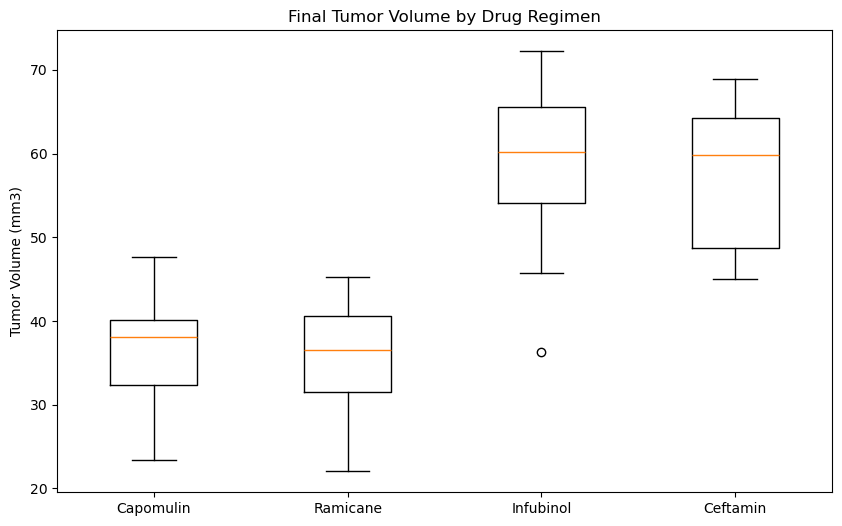

In [55]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.
# Create box plot
plt.figure(figsize=(10, 6))
plt.boxplot([merged_df[merged_df["Drug Regimen"] == t]["Tumor Volume (mm3)"] for t in treatments], 
            labels=treatments)  
plt.title("Final Tumor Volume by Drug Regimen")
plt.ylabel("Tumor Volume (mm3)")
plt.show()




In [57]:
# capomulin_nice
capomulin_mice = merged_df[merged_df["Drug Regimen"] == "Capomulin"]["Mouse ID"].unique()
capomulin_mice

array(['b128', 'b742', 'f966', 'g288', 'g316', 'i557', 'i738', 'j119',
       'j246', 'l509', 'l897', 'm601', 'm957', 'r157', 'r554', 'r944',
       's185', 's710', 't565', 'u364', 'v923', 'w150', 'w914', 'x401',
       'y793'], dtype=object)

In [59]:
capomulin_mouse = merged_df[(merged_df["Drug Regimen"] == "Capomulin") & (merged_df["Mouse ID"] == "l509")]
capomulin_mouse

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
109,l509,45,Capomulin,Male,17,21,41.483008,3


## Line and Scatter Plots

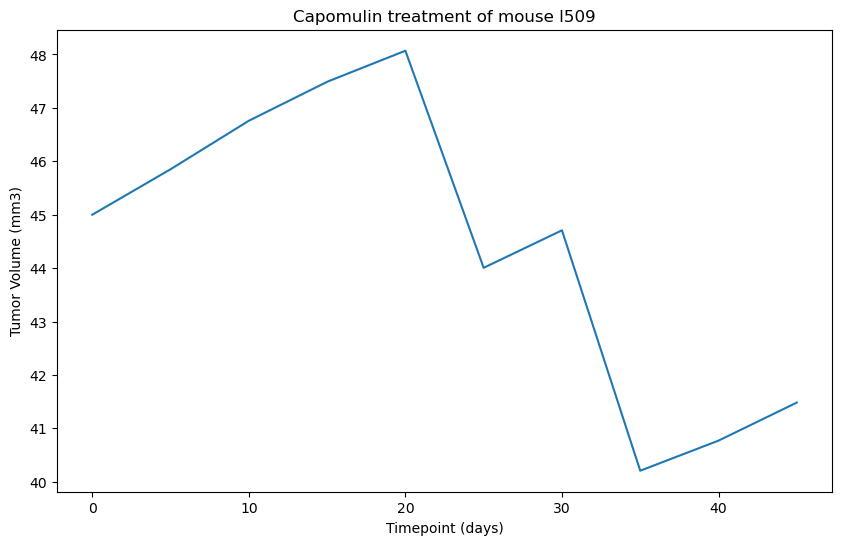

In [61]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
capomulin_mouse = mice_clean_df[(mice_clean_df["Drug Regimen"] == "Capomulin") & (mice_clean_df["Mouse ID"] == "l509")]
plt.figure(figsize=(10, 6))
plt.plot(capomulin_mouse["Timepoint"], capomulin_mouse["Tumor Volume (mm3)"])
plt.title("Capomulin treatment of mouse l509")
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

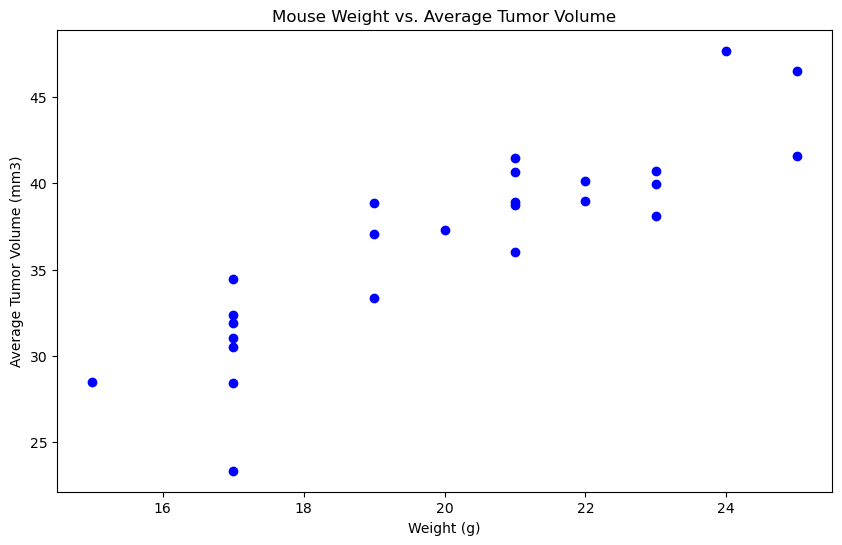

In [63]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
capomulin_data = merged_df[merged_df["Drug Regimen"] == "Capomulin"]
average_tumor_volume = capomulin_data.groupby("Mouse ID")["Tumor Volume (mm3)"].mean()
mouse_weight = capomulin_data.groupby("Mouse ID")["Weight (g)"].first()

plt.figure(figsize=(10, 6))
plt.scatter(mouse_weight, average_tumor_volume, color='blue')
plt.title("Mouse Weight vs. Average Tumor Volume")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()

## Correlation and Regression

The correlation between mouse weight and average tumor volume is 0.8767


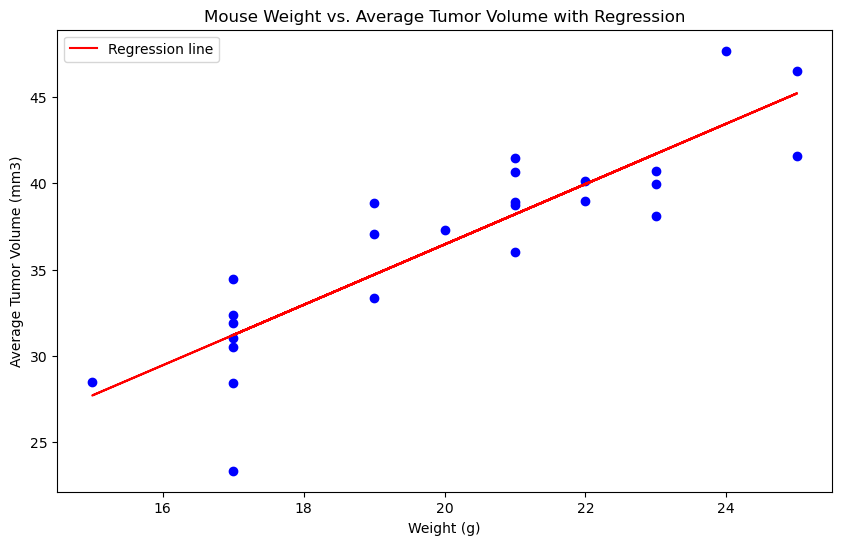

The r-squared value is: 0.7686


In [65]:
# Calculate the correlation coefficient and a linear regression model
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
correlation = st.pearsonr(mouse_weight, average_tumor_volume)
print(f"The correlation between mouse weight and average tumor volume is {correlation[0]:.4f}")

slope, intercept, r_value, p_value, std_err = st.linregress(mouse_weight, average_tumor_volume)

plt.figure(figsize=(10, 6))
plt.scatter(mouse_weight, average_tumor_volume, color="blue")
plt.plot(mouse_weight, slope * mouse_weight + intercept, color="red", label="Regression line")
plt.title("Mouse Weight vs. Average Tumor Volume with Regression")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.legend()
plt.show()

print(f"The r-squared value is: {r_value**2:.4f}")